#Welcome to my Home Loan EDA!

One of my favorite hobbies is looking online at things I can't afford. As a result, I've spent countless hours perusing houses with down payments more than my entire net worth. Like most people, I'd like to eventually own my own place when housing prices and mortgages become more reasonable, so what better way to prepare for that than to analyze housing data?

   The objective of this project is to run an Exploratory Data Analysis (EDA) on home loan data. EDA is a process of utilizing statistical and visualization techniques on a data set to understand patterns, identify outliers, and fact check our hypotheses. 

There are 4 vital components to any EDA:

    1) Data Collection
    2) Data Cleaning
    3) Univariate Analysis
    4) Bivariate Analysis

To begin, we need to import all neccesary Python libraries to read in the data:

#STEP 1: DATA COLLECTION

In [36]:
#upload neccesary modules and data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Home_Loan_Data=pd.read_csv('loan_sanction_train.csv')

Home_Loan_Data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y


Looking at the dataframe 'Home_Loan_Data', we can see multiple different columns. This is a perfect time to come up with some hypotheses, which I have listed below:

1) Applicant Income will have the greatest influence on Loan Status
2) Coapplicant Income will greatly improve the chances of getting a loan

At the end of the EDA, we'll revisit these hypotheses and see how accurate (or wrong) my predictions were, and also cover any new insights.

#STEP 2: DATA CLEANING

To clean the data, let's first remove the Loan_ID column. In general, we want to be analyzing quantitative or categorical data, rather than unique identifiers. 

In [37]:
#Drop loan_ID 

Home_Loan_Data=Home_Loan_Data.drop('Loan_ID', axis=1)

Home_Loan_Data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,1.0,Urban,Y


The next step is to check for duplicated data. We first use .loc to target the location of any duplicates, then use df.drop_duplicates() to remove any identified dupes. Fortunately, it appears every row contains unique data, so we wont have to drop any.

In [38]:
#Checking for location of duplicated data.
Home_Loan_Data.loc[Home_Loan_Data.duplicated()].drop_duplicates()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status


Identifying missing data is also an important step in data cleaning. If a column is missing a significant amount of data, then it should warrant further investigation or be deleted. "Significant" data is subjective to the project, but multiple studies suggest columns missing 10+ percent of their data may led to biased statistical analysis.

To find the percentage of missing data in all columns, we are going to create 2 variables and a new dataframe:

    1) total-finds all null values and adds them up
    2) percent-(sum of all null values)/(count of all null values)
    3) missing_data-concatenantes the 'total' and 'percentage' into columns through (axis=1), and capitalize first letter
    
Fortunately, it appears that none of them are above 10 percent. (Credit_History come pretty close at 8.14 percent though!)

In [39]:
#Find missing data

total = Home_Loan_Data.isnull().sum().sort_values(ascending=False)
percent = (Home_Loan_Data.isnull().sum()/Home_Loan_Data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Gender,13,0.021173
Married,3,0.004886
Education,0,0.000000
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000
Property_Area,0,0.000000


After cleaning up all of the data, let's get a big picture overview using df.info(). As we can see, there are 614 entries, and many of the columns have an object data type, which will need to be addressed, as data visualization and statistical analysis are quite limited with string data.

Additionally, this confirms the missing_data dataframe above is correct, as the missing values from all columns were identified.

In [40]:
#Big picture overview of the data 

Home_Loan_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 52.9+ KB


We're almost done with data cleaning; just one more thing to deal with-Outliers. While this is technically the start of step 3, univariate analysis (exploring individual variables), I'd prefer to still consider identifying and removing outliers as data cleaning.

Taking a look at the box and whisker plots, we can see that the quantitative columns all have outliers above Q3, This is significant because it suggests there are extreme values causing the data to skew to right, with the tail being on the right and head on the left. From this, we can insinuate that these columns have:

    1) A Mode lower than the Median or Mean, which suggests most values are lower than the average value
    2) A Mean higher than the Median, stating the average value is higher than the middle value
    
A balanced dataset would have the Mean=Median, so we should remove the outliers to paint a more accurage picture.

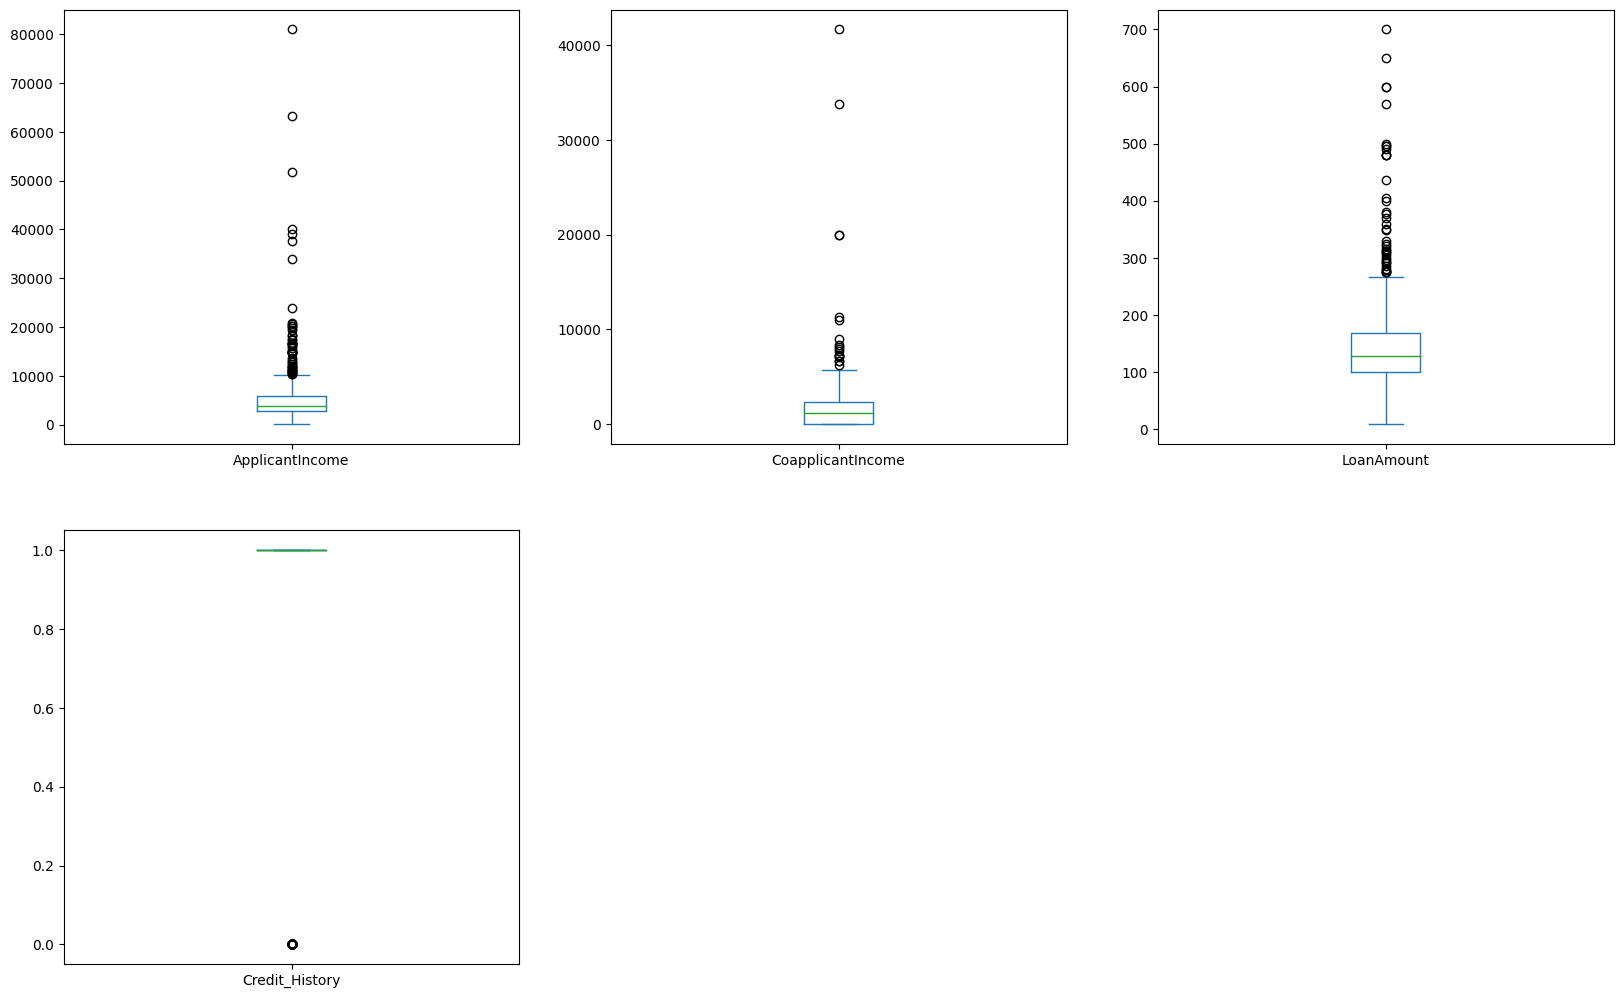

In [41]:
#Visualize Outliers
Home_Loan_Data.plot(kind='box', subplots=True, layout=(12,3), sharex=False, sharey=False, figsize=(20, 80))
plt.show()

While box and whisker charts easily visualize outliers, identifying the specific data points is not quite as simple. First, we need to define Q1, Q3, and the IQR of the box and whisker plot, then add up all the values to put into an empty list.

In [42]:
#Use the IQR method to identify outliers

def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    
    ls=df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls 

With all the outliers identified, let's put them into an empty list, index_list. 

A For Loop goes through the 3 listed columns (ignore credit history b/c it has no outliers) and applies extend().

The extend() function adds any values from a list, tuple, string, etc. to the end of the index_list that meet the requirements of our 'outliers' function.

In [62]:
#create an empty list to store output indices from multiple columns

index_list=[]
for x in ['ApplicantIncome', 'CoapplicantIncome','LoanAmount']:
    index_list.extend(outliers(Home_Loan_Data, x))
    
index_list

[9,
 34,
 54,
 67,
 102,
 106,
 115,
 119,
 126,
 128,
 130,
 138,
 144,
 146,
 155,
 171,
 183,
 185,
 191,
 199,
 254,
 258,
 271,
 278,
 284,
 308,
 324,
 333,
 369,
 370,
 409,
 424,
 432,
 438,
 443,
 467,
 475,
 478,
 483,
 487,
 493,
 506,
 509,
 525,
 533,
 534,
 561,
 572,
 594,
 604,
 9,
 12,
 38,
 122,
 135,
 177,
 180,
 253,
 349,
 372,
 402,
 417,
 444,
 506,
 513,
 523,
 581,
 600,
 9,
 21,
 34,
 54,
 67,
 126,
 130,
 135,
 155,
 161,
 171,
 177,
 233,
 253,
 258,
 260,
 278,
 308,
 324,
 325,
 333,
 351,
 369,
 372,
 381,
 391,
 409,
 432,
 487,
 506,
 514,
 523,
 525,
 536,
 561,
 572,
 592,
 600,
 604]

There's quite a few outliers. Counting them up returns 107 to be removed. Note that 107 isn't the number of rows with outliers, but rather all of individual cells within the dataframe containing outliers.

In [63]:
#count outliers
outlier_count=len(index_list)

outlier_count

107

Remove the outliers by dropping all values in 'ls', which was the index that captured all of the original outliers. Next, create a new dataframe: 'Home_Loan_Data_Cleaned'

In [64]:
#remove outliers

def remove (df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

Home_Loan_Data_Cleaned=remove(Home_Loan_Data, index_list)

Now, use df.info() again to compare the columns with outliers versus after removing them. As you can see, each column has fewer rows, which makes sense, since the previous box and whisker charts identified multiple outliers.

In [65]:
Home_Loan_Data_Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             528 non-null    object 
 1   Married            534 non-null    object 
 2   Dependents         523 non-null    object 
 3   Education          537 non-null    object 
 4   Self_Employed      508 non-null    object 
 5   ApplicantIncome    537 non-null    int64  
 6   CoapplicantIncome  537 non-null    float64
 7   LoanAmount         517 non-null    float64
 8   Credit_History     493 non-null    float64
 9   Property_Area      537 non-null    object 
 10  Loan_Status        537 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 50.3+ KB


Df.describe provides general stats. Most columns have a similar mean and median (50%) value, suggesting the data is more balanced. Now we'll begin the next step of our EDA.

In [1]:
Home_Loan_Data_Cleaned.describe()

NameError: name 'Home_Loan_Data_Cleaned' is not defined

Just out of curiosity, I'd also like to also see the breakdown of all entries and their loan approval status. 

In [93]:
#Set Loan Status as Index
L=Home_Loan_Data_Cleaned.Loan_Status

counts=L.value_counts()
percent=L.value_counts(normalize=True)
percent_100=L.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Occurences_And_Pct=pd.DataFrame({'number of occurences': counts, 'percent':percent_100})
Occurences_And_Pct.index.names=['Loan Approved?']

Occurences_And_Pct

,number of occurences,percent
Loan Approved?,,
Y,373,69.5%
N,164,30.5%


#STEP 3: UNIVARIATE ANALYSIS

There are multiple qualitative columns to analze. By identifying a listt of qualitative columns and creating a For Loop, we can create multiple bar charts simultaneously. Changing the hue to 'Loan_Status' provides further insight.

At a visual level, we can confirm the following:

    1) Married buyers get loans at a higher percentage than single buyers

    2) Buyers with 2 kids have the highest chance of getting a loan. Perhaps 0 children correlates more with being 
    single or having multiple children may negatively impact funds to pay off loans

    3) Graduates get loans at a higher percentage than non graduates. This likely correlates with applicant income.

    4) The order or loan likeliness for properties areas is semiurban, urban, than rural

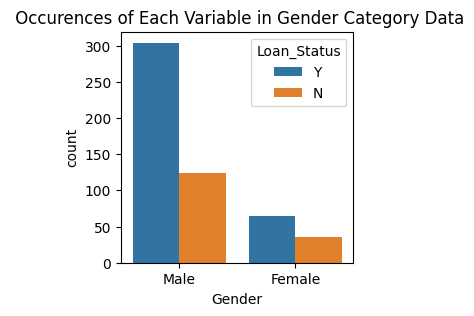

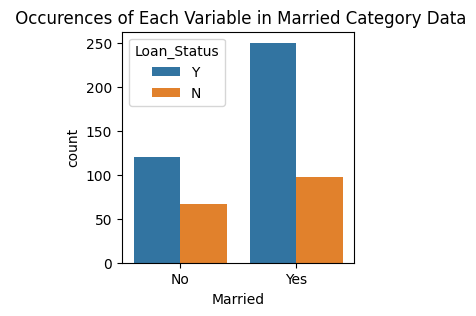

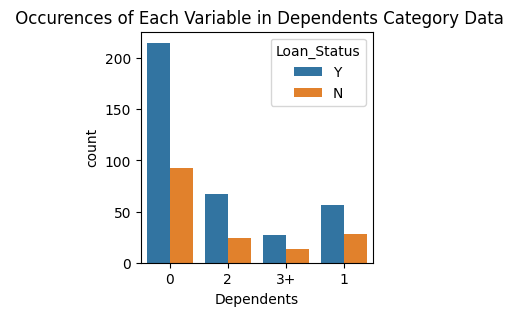

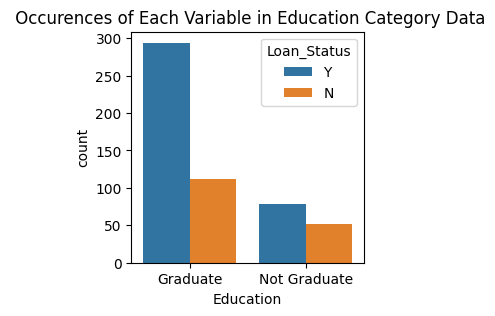

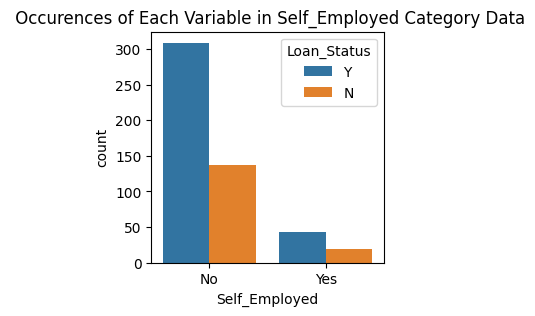

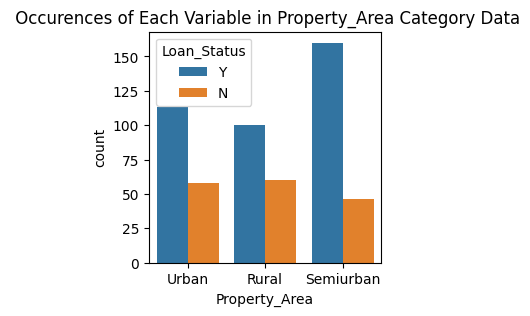

In [94]:
#Defining categorical columns
Categorical_Home_Loan_Data=Home_Loan_Data_Cleaned[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']]

#analysing categorical variables with Loan status
for col in Categorical_Home_Loan_Data:
    plt.figure(figsize=(3,3))
    sns.countplot(data=Home_Loan_Data_Cleaned,x=col, hue='Loan_Status')
    plt.title(' Occurences of Each Variable in '+col+' Category Data')
    plt.show()

#STEP 4: BIVARIATE ANALYSIS

As previously mentioned, there were multiple columns with a string object as a data type. This is problematic because Matplotlib and Seaborn don't work with them. Luckily, there is a data type called "Categorical". Essentially, it converts all unique values in a column to an integer. For example, in the 'Gender' column, Male=1 and Female=0.

To do this, create a For Loop to detect all columns with an 'object' data type, then change all of them in 'category' data types

In [22]:
#change columns with string data types into categorical

Object_To_Category_Home_Loan_Data=Home_Loan_Data_Cleaned

for col_name in Object_To_Category_Home_Loan_Data.columns:
    if(Object_To_Category_Home_Loan_Data[col_name].dtype=='object'):
        Object_To_Category_Home_Loan_Data[col_name] = Object_To_Category_Home_Loan_Data [col_name].astype('category')
        Object_To_Category_Home_Loan_Data[col_name] = Object_To_Category_Home_Loan_Data [col_name].cat.codes
        
Object_To_Category_Home_Loan_Data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,1.0,2,1


Now, you may be wondering-what good could possibly come from changing all the qualitative columns into numbers? Wouldn't that do more harm than good? 

Well, the Seaborn Python Library has an incredibly powerful, color-coded correlation matrix, known as heatmaps. By changing all column values into integers and floats, we can now find the correlation between EVERY column!

Taking a look down below, there's a couple of high correlations, namely:
   1) (Applicant Income and Loan Amount)
   2) (Credit History and Loan Status)

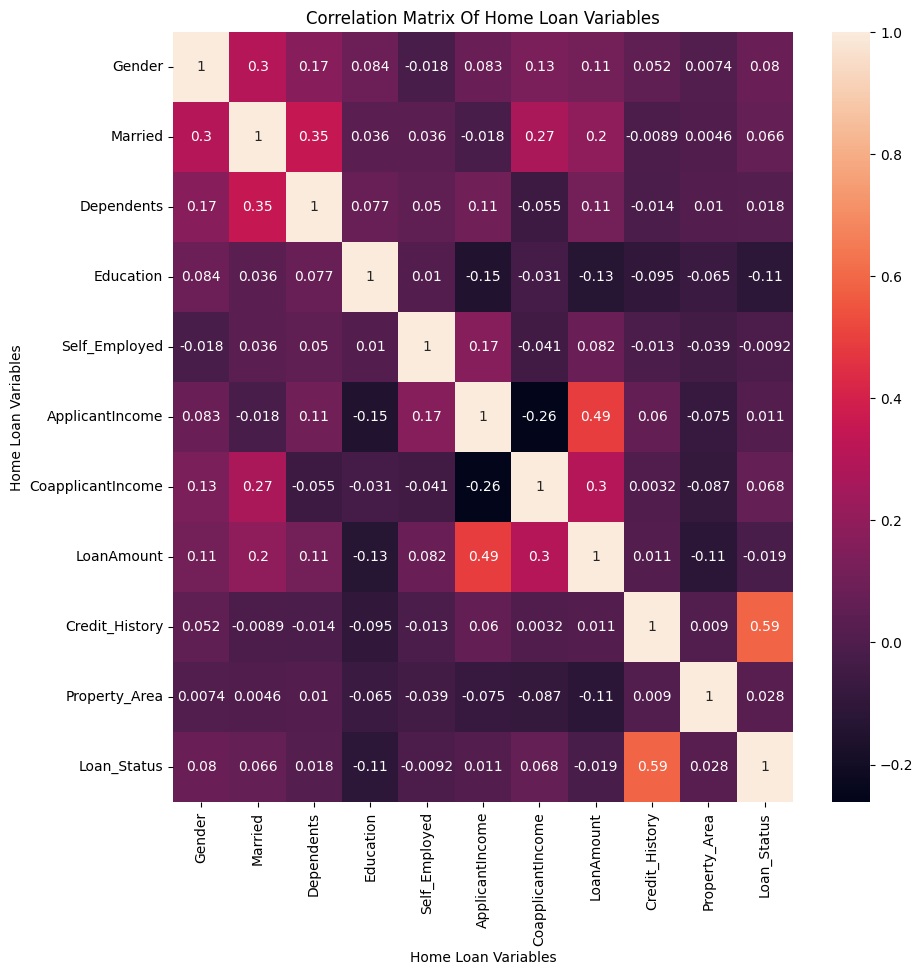

In [23]:
correlation_matrix = Object_To_Category_Home_Loan_Data.corr(method='pearson')

fig, ax =plt.subplots(figsize=(10,10))

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix Of Home Loan Variables')

plt.xlabel('Home Loan Variables')

plt.ylabel('Home Loan Variables')

plt.show()

I'm personally interested in visualizing what influences Loan Status. After all, the loan amount doesn't even matter if you can't get one in the first place.

There is a moderate positive correlation based on the trend line, which aligns with what was seen in the heatmap visual

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

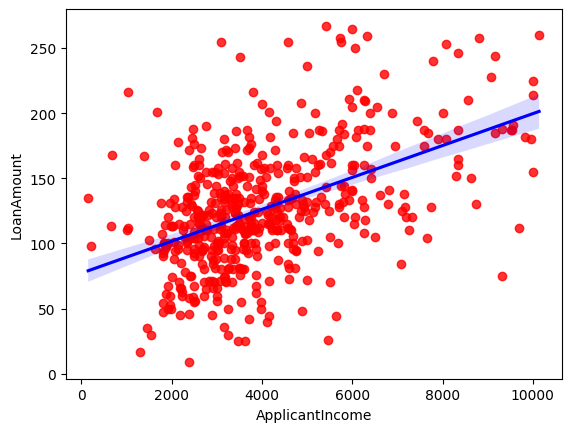

In [24]:
#scatterplot-taking a closer look from heatmap between applicant income and loan amount. The rest have low correlations

sns.regplot(x='ApplicantIncome', y='LoanAmount', data=Object_To_Category_Home_Loan_Data, 
           scatter_kws={"color" : "red"}, line_kws={"color" : "blue"})

While the heatmap suggested most columns had a low correlation to each other, it may still be meaningful to see them. sns.pairplot is a convenient way to visualize a bivariate analysis of all quantitative data. Looking below, there are actually a few surprising new observations to be had from the pairplot.

    1) Credit History Rows & Column: No credit history means you very likely won't get a loan, regardless of 
    your (or coapplicant's) income

    2) Heatmap and pairplot show a moderate positive correlation (0.49) between applicant income and loan amount.
    This is common sense, but what is surprising is coapplicant income has very little positive impact on loan amount.
    I've always been told more applicants would be better, but the the positive correlation (0.30) is not that much.

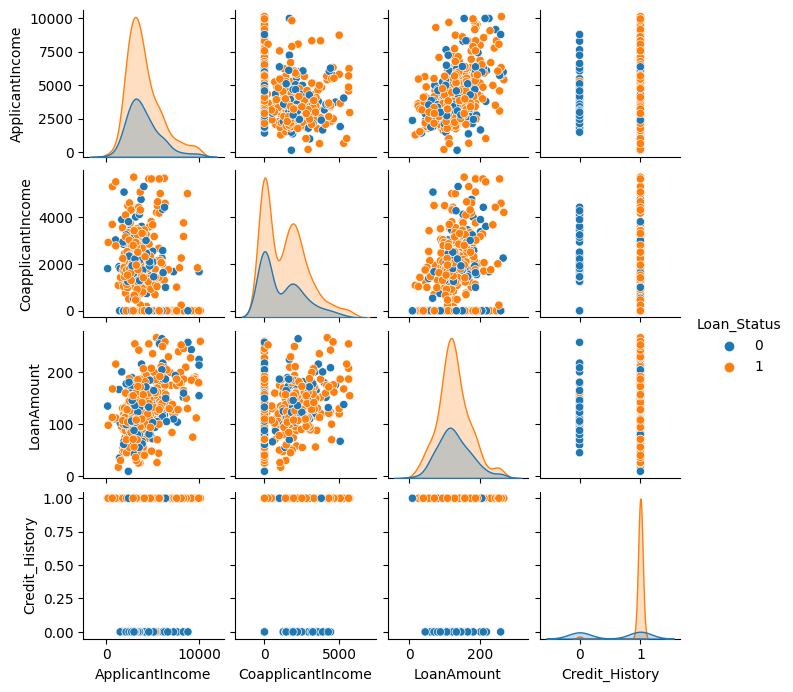

In [25]:
#scatterplot for numerical values, and colored based on if the loan was approved or not
sns.pairplot(Object_To_Category_Home_Loan_Data, 
             vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History'],
             hue='Loan_Status',
             size=1.75)
plt.show();

After putting the Home Loan Data through multiple relevant visual and statistical analyses, we've been rewarded with a treasure trove of insights. Let's wrap this up by listing all of the column pairings with high correlations, then close off this project by discussing the accuracy of my hypotheses and any other meaning ful observations.

In [26]:
#list of only the high correlations

organized_corr = Object_To_Category_Home_Loan_Data.corr()

corr_pairing = organized_corr.unstack()

#Next step
sorted_pairs = corr_pairing.sort_values()

#Final Step
high_corr_pairs=sorted_pairs[(sorted_pairs) > 0.4]

high_corr_pairs

ApplicantIncome    LoanAmount           0.489420
LoanAmount         ApplicantIncome      0.489420
Credit_History     Loan_Status          0.586204
Loan_Status        Credit_History       0.586204
Gender             Gender               1.000000
ApplicantIncome    ApplicantIncome      1.000000
Credit_History     Credit_History       1.000000
LoanAmount         LoanAmount           1.000000
CoapplicantIncome  CoapplicantIncome    1.000000
Self_Employed      Self_Employed        1.000000
Education          Education            1.000000
Dependents         Dependents           1.000000
Married            Married              1.000000
Property_Area      Property_Area        1.000000
Loan_Status        Loan_Status          1.000000
dtype: float64

Below are the hypotheses I set before analyzing the data:

    1) Applicant Income will have the greatest influence on Loan Status
    
    2) Coapplicant Income will greatly improve the chances of getting a loan 

Regarding #1, the heatmap shows a weak correlation (0.011) between Applicant Income and Loan Status. However, Applicant Income did strongly positively correlate with Loan Amount, so get a high paying job if you want a big loan!

I definitely overestimated #2. Coapplicant income had a moderate correlation of (0.30) with Loan Status, so having a partner should not be overlooked if attempting to maximize the chance of getting a loan.

There were some additional observations from this EDA, including the following:

       1) Credit History Rows & Column: No credit history means you very likely won't get a loan, regardless of your 
       (or coapplicant's) income
    
       2) Heatmap and pairplot show a moderate positive correlation (0.49) between applicant income and loan amount. This 
       is common sense, but what is surprising is coapplicant income has very little positive impact on loan amount. I've 
       always been told more applicants would be better, but the the positive correlation (0.30) is not that much.  
       
       3) Credit History is the biggest influencer of Loan Status. I knew paying off credit cards in full every month was 
       worth it!
   
Well, it looks like we're finally at the end of the project. Thank you for walking through this EDA with me, and hopefully it provided some valuable insights on how to increase one's chances of obtaining a home loan! 